[![Open In
Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Chap5/19-Parametric-CI-Means.ipynb)
<nbsp>



# <a name="19intro">5.4: Parametric Confidence Intervals for Means</a>

---

We have been investigating [resampling methods](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Chap5/16-Bootstrap-Dist.ipynb)
as a tool to estimate the variability in sample statistics. Statistics
such as means and proportions are linear combinations of random
variables, and using [theory from probability](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Chap2/06-Expected-Value-and-Variance.ipynb#06prop-ex) we are able the
derive the [Central Limit Theorem (CLT)
formulas](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Chap3/10-Sampling-Dist-Mean.ipynb#10CLT) to model sampling
distributions for means and proportions. In this section we will
construct confidence intervals by applying a *parametric* approach that
uses formulas from the CLT to measure the uncertainty (standard error)
in our estimate.

-   With  <font color="dodgerblue">**parametric methods**</font>, we perform inference using formulas derived from theory.
-   Monte Carlo methods such as bootstrap resampling are non-parametric.

For statistics that are not linear combinations of independent random
variables (such as medians, variances, and ratios of means) deriving
formulas to model the sampling distribution is more complicated or not
even possible. We can try [bootstrapping in these
situations](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Chap5/18-Bootstrap-Other-Stats.ipynb) instead!

# <a name="19wind-intro">Case Study: Average Wind Speed of Storms</a>

---


<figure>
<img
src="https://cdn.pixabay.com/photo/2012/09/26/17/26/winter-storm-58025_1280.jpg"
alt="Satellite Image of Hurricane" width = "40%"/>
<figcaption aria-hidden="true">
Credit: WikiImages, CC0 via <a
href="https://pixabay.com/photos/hurricane-cyclone-typhoon-wind-58025/">Pixabay</a>
</figcaption>
</figure>


Suppose a climatologist has contacted us for help estimating the average
wind speed of all storms in the North Atlantic. They have collected a
random sample of $n=36$ wind speeds from North Atlantic storms over the
past 5 years.

## <a name="19wind-load">Loading Storms Data</a>

---

When practicing [exploratory data analysis
earlier](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Chap1/03-EDA-Quantitative.ipynb#03data), we accessed the `dplyr`
package that contains a data set from the [NOAA Hurricane Best Track
Data](https://www.nhc.noaa.gov/data/#hurdat), called `storms`, with data
on many different storm attributes. We will begin analyzing the variable
`wind` that gives the wind speed in knots. Run the code cell below to:

-   Load the `dplyr` package (which should already be installed), and
-   Store the wind speeds to a new vector called `population`.

If you receive an error message when running the code cell below, then
you may not have the `dplyr` package installed.

-   In the R console, run the command `install.packages("dplyr")`.
-   Then rerun the code cell below.

In [1]:
library(dplyr)
population <- storms$wind


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## <a name="19wind-samp">Picking a Random Sample of Storms</a>

---

When performing statistical inference, we do not have complete data from
the entire population. We typically have data from one sample picked
randomly from the population. Based on the sample data, we try to
estimate unknown parameters for the population. To begin our exploration
of confidence intervals, suppose the 19066 wind speeds in the
`population` data represents the full population of all storms at all
times in the North Atlantic. We investigate the following statistical
question:

> What is the average wind speed of all storms in the North Atlantic,
> $\mu_{\rm{wind}}$?

-   Assume we do not have access to all the `population` data and cannot directly calculate $\mu_{\rm{wind}}$.
-   We will pick one random sample of 36 wind speeds from the `population`.
-   We will use our sample to estimate the mean wind speed of all storms in the North Atlantic.

## <a name="19q1">Question 1</a>

---

Pick a random sample of $n=36$ wind speeds from the `population`. In
picking your original sample, sample without replacement. Store your
sample to a vector named `my.sample`.

### <a name="19sol1">Solution to Question 1</a>

---

In [ ]:
# pick one random sample of 36 wind speeds without replacement
my.sample <- sample(??, size = ??, replace = ??)

<br>  
<br>

## <a name="19q2">Question 2</a>

---

Using the random sample `my.sample`, give a possible point estimate for
$\mu_{\rm{wind}}$, the mean wind speed of all storms in the North
Atlantic. The parameter $\mu_{\rm{wind}}$ is unknown since we assume the
full `population` data is not available.

### <a name="19sol2">Solution to Question 2</a>

---

In [ ]:
# use your sample to give a point estimate


<br>  
<br>

# <a name="19wind-boot">A Bootstrap Confidence Interval</a>

---

Before introducing parametric methods for constructing a confidence
interval estimate, we first apply resampling methods to construct a
[bootstrap distribution](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Chap5/16-Bootstrap-Dist.ipynb) from the sample
`my.sample` that we can use to construct a [bootstrap confidence
interval](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Chap5/17-Bootstrap-Confidence-Int.ipynb). The code below uses the
original sample `my.sample` to generate a bootstrap distribution for the
sample mean wind speed (with $n=36$) that is stored in `boot.wind` for
the next step.

If you are not familiar with bootstrapping methods, but you would like
to learn more about parametric methods, feel free to jump to the next
section on [parametric methods](#19param-intro).

In [4]:
# pick one random sample of 36 wind speeds without replacement
set.seed(14)  # fixing seeding for randomization
my.sample <- sample(population, size = 36, replace = FALSE)

N <- 10^5  # Number of bootstrap samples
boot.wind <- numeric(N)  # create vector to store bootstrap means
n <- 36  # sample size

# for loop that creates bootstrap dist
for (i in 1:N)
{
  x <- sample(my.sample, size = n, replace = TRUE)  # pick a bootstrap resample
  boot.wind[i] <- mean(x)  # compute bootstrap sample mean
}

boot.wind.est <- mean(boot.wind)  # mean of bootstrap dist
boot.wind.se <- sd(boot.wind)  # bootstrap standard error
my.mean <- mean(my.sample)  # original sample mean

In the code cell below, we use the bootstrap sample means (stored in
`boot.wind` above) to construct a 95% bootstrap percentile confidence
interval estimate for the mean wind speed of all North Atlantic storms.

In [5]:
lower.boot.wind <- quantile(boot.wind, 0.025)  # lower 95% cutoff
upper.boot.wind <- quantile(boot.wind, 0.975)  # upper 95% cutoff

# print to screen
lower.boot.wind
upper.boot.wind

2.5% 
51.25

97.5% 
72.36111

Based on the output from the previous code cell, we have a 95% bootstrap
percentile confidence interval for the mean wind speed of all North
Atlantic storms, namely from 51.25 knots to 72.36 knots. *Note the
interval estimates may vary, so you likely have a slightly different
interval estimate if you are working with a different sample.*

In the code cell below, we plot the bootstrap distribution with the
 <font color="tomato">original sample mean</font> of `my.sample`
marked with a red vertical line and the
 <font color="dodgerblue">cutoffs for the confidence
interval</font> marked with blue vertical lines.

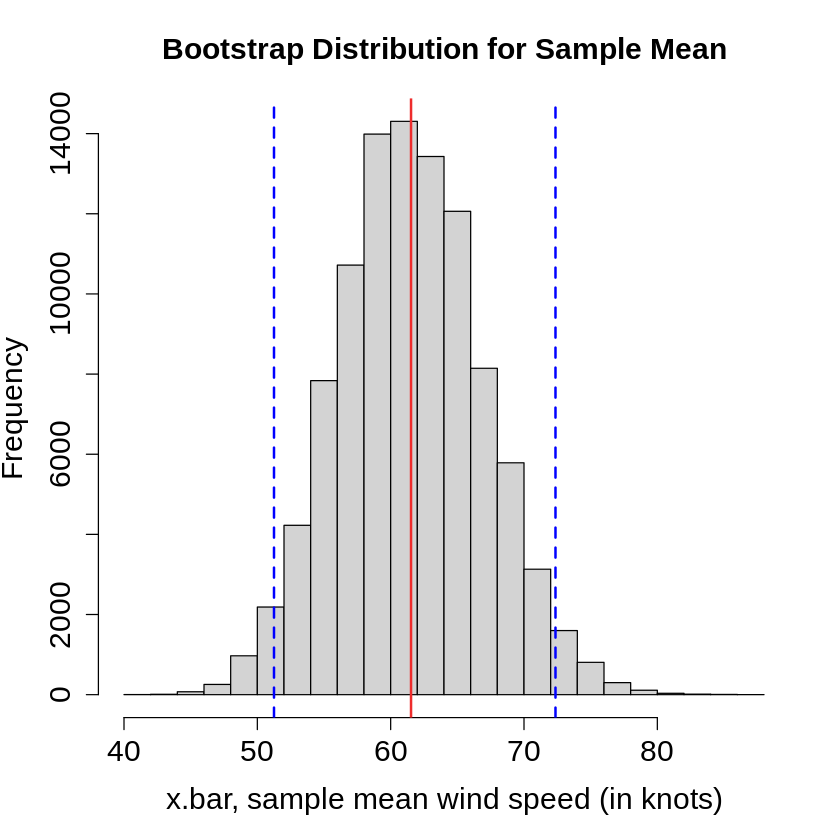

In [7]:
#################################
# code is ready to run!
# no need to edit the code cell
#################################

# plot bootstrap distribution
hist(boot.wind,
     breaks=20,
     xlab = "x.bar, sample mean wind speed (in knots)",
     main = "Bootstrap Distribution for Sample Mean",
     cex.lab=1.5, cex.axis=1.5, cex.main=1.5)  # increase font size on labels

# red line at the observed sample proportion
abline(v = my.mean, col = "firebrick2", lwd = 2, lty = 1)

# blue lines marking cutoffs
abline(v = lower.boot.wind, col = "blue", lwd = 2, lty = 2)
abline(v = upper.boot.wind, col = "blue", lwd = 2, lty = 2)

# <a name="19param-intro">A Parametric Method for Interval Estimates</a>

---

Recall the [68%-95%-99.7% empirical
rule](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Chap2/08-Common-Continuous-Distributions.ipynb#08empirical) for normal
distributions that states approximately:

-   68% of all values fall within one standard deviation (both above and below) from the mean.
-   95% of all values fall within two standard deviations of the mean.
-   99.7% of all values fall within three standard deviations of the mean.

## <a name="19q3">Question 3</a>

---

Check the accuracy of the empirical rule for normal distributions.

### <a name="19q3a">Question 3a</a>

---

Using the R code cell below, check the accuracy of the approximation
that 68% of the data is within $\pm 1$ standard deviation from the mean.

Using the standard normal distribution $Z \sim N(0,1)$, compute
$P(-1 < Z < 1)$.

#### <a name="19sol3a">Solution to Question 3a</a>

---

In [ ]:
# how much data is within +/- 1 standard deviation?


<br>  
<br>

### <a name="19q3b">Question 3b</a>

---

Using the R code cell below, check the accuracy of the approximation
that 95% of the data is within $\pm 2$ standard deviation from the mean.

#### <a name="19sol3b">Solution to Question 3b</a>

---

In [ ]:
# how much data is within +/- 2 standard deviations?


<br>  
<br>

### <a name="19q3c">Question 3c</a>

---

Using the R code cell below, check the accuracy of the approximation
that $99.7$% of the data is within $\pm 3$ standard deviation from the
mean.

#### <a name="19sol3c">Solution to Question 3c</a>

---

In [ ]:
# how much data is within +/- 3 standard deviations?


<br>  
<br>

### <a name="19q3d">Question 3d</a>

---

Let's improve the approximation that 95% of the data is withing $\pm 2$
standard deviations from the mean. Find a more accurate approximation
for $z^*$ such that $P( -z^* < Z < z^* ) = 0.95$.

Sketch a picture to help determine how much area is in the left tail
below $-z^*$ if 95% of the area is between $-z^*$ and $z^*$. Then use
the `qnorm()` command.

#### <a name="19sol3d">Solution to Question 3d</a>

---

In [ ]:
# find more accurate cutoffs for the middle 95%
qnorm(??, 0, 1)

<br>  
<br>

## <a name="19q4">Question 4</a>

---

Let $X$ denote the wind speed of a randomly selected North Atlantic
storm. We use $\mu$ and $\sigma$ to denote the mean and standard
deviation, respectively, of the wind speed of the population of all
storms in the North Atlantic. Answer the questions below to investigate
a different approach to constructing an interval estimate for $\mu$.

### <a name="19q4a">Question 4a</a>

---

Let $\overline{X}$ denote the distribution of sample means for samples
size $n$. Recall we denote the mean and standard error of the sampling
distribution as $\mu_{\overline{X}}$ and $\sigma_{\overline{X}}$,
respectively.

Justify each of the steps below.

$$\begin{aligned}
0.95 &= P \left( -1.96 < Z < 1.96 \right) & \mbox{from Question 3d}\\
0.95 &= P \left( -1.96 < \frac{\overline{X} - \mu_{\overline{X}}}{\sigma_{\overline{X}}} < 1.96 \right) & \mbox{Explanation 1}\\
0.95 &=  P \left( -1.96 < \frac{\overline{X} - \mu}{\frac{\sigma}{\sqrt{n}}} < 1.96 \right) & \mbox{Explanation 2}\\
0.95 &= P \left( -1.96 \cdot \frac{\sigma}{\sqrt{n}} < - \mu <  1.96 \cdot \frac{\sigma}{\sqrt{n}} \right) & \mbox{Explanation 3} \\
0.95 &= P \left( - \overline{X} -1.96 \cdot \frac{\sigma}{\sqrt{n}} < - \mu <  - \overline{X} + 1.96 \cdot \frac{\sigma}{\sqrt{n}} \right) & \mbox{Explanation 4} \\
0.95 &= P \left( \overline{X} - 1.96 \cdot \frac{\sigma}{\sqrt{n}} < \mu < \overline{X}+1.96 \cdot \frac{\sigma}{\sqrt{n}} \right) & \mbox{Explanation 5}\\
\end{aligned}$$

#### <a name="19sol4a">Solution to Question 4a</a>

---

Explanation 1:

<br>

Explanation 2:

<br>

Explanation 3:

<br>

Explanation 4:

<br>

Explanation 5:

<br>  
<br>

### <a name="19q4b">Question 4b</a>

---

Let $\mu_{\rm{wind}}$ denote the mean wind speed of all North Atlantic
storms which we assume is unknown. How can we use the result that
$P \left( \overline{X} - 1.96\cdot \sigma_{\overline{X}} < \mu_{\rm{wind}} < \overline{X}+1.96 \cdot \sigma_{\overline{X}} \right)=0.95$
to help construct a confidence interval for $\mu_{\rm{wind}}$?

#### <a name="19sol4b">Solution to Question 4b</a>

---

<br>  
<br>  
<br>

### <a name="19q4c">Question 4c</a>

---

You will use the original random sample of $n=36$ wind speeds stored in
`my.sample` in \[Question 1\] to construct an interval estimate using
the result from \[Question 4b\]. If you have not already loaded the
`population` data and created a sample size $n=36$ stored in
`my.sample`, be sure to answer \[Question 1\] before continuing. Create
a histogram to display the wind speeds in `my.sample`.

#### <a name="19sol4c">Solution to Question 4c</a>

---

In [ ]:
# Enter code to create a histogram to display your sample


<br>  
<br>

### <a name="19q4d">Question 4d</a>

---

Are the assumptions for the CLT for means satisfied by the data in
`my.sample`? Explain why or why not.

#### <a name="19sol4d">Solution to Question 4d</a>

---

<br>  
<br>  
<br>

### <a name="19q4e">Question 4e</a>

---

We assume the `population` data is unknown and we do not know the actual
value of the parameter $\mu_{\rm{wind}}$. However, **suppose we do know
the population variance** $\mbox{Var}(X) = \sigma^2_{\rm{wind}} = 650$
square knots. Using the CLT for means, what is the value of
$\sigma_{\overline{X}}$, the standard error of the sampling distribution
for $\overline{X}$? Show your work below either doing calculations by
hand or in R. *Tip: In R, the square root function is `sqrt()`.*

#### <a name="19sol4e">Solution to Question 4e</a>

---

In [ ]:
# compute standard error using CLT


<br>  
<br>  
<br>

### <a name="19q4f">Question 4f</a>

---

Give an interval of values $?? < \mu_{\rm{wind}} < ??$ that has a 95%
chance of containing the actual value of $\mu_{\rm{wind}}$. Include
supporting work/code to explain how you determined your answer.

#### <a name="19sol4f">Solution to Question 4f</a>

---

In [ ]:
# compute upper and lower cutoffs for interval estimate


<br>  
<br>  
<br>

# <a name="19ci-95">95% Confidence Interval for a Mean</a>

---

For a sample size $n$ randomly picked from a normal distribution with
unknown $\mu$ and known $\mbox{Var}(X)=\sigma^2$, a
 <font color="dodgerblue">**95% confidence interval for the
mean**</font> is

$${\color{dodgerblue}{\boxed{ \large \overline{X} - 1.96 \frac{\sigma}{\sqrt{n}} < \mu <  \overline{X} + 1.96 \frac{\sigma}{\sqrt{n}}}}}.$$

If we draw 1000's of random samples each size $n$ from a normal
distribution with parameters $\mu$ and $\sigma^2$ and compute a 95%
confidence interval from each sample, then
 <font color="dodgerblue">**about 95% of the intervals would
successfully contain** $\mu$</font>.

## <a name="19q5">Question 5</a>

---

A another climatologist collects their own random sample of $n=36$ wind
speeds of North Atlantic storms.

### <a name="19q5a">Question 5a</a>

---

Pick their random sample (without replacement) of $n=36$ wind speeds
from the `population`. Store the other sample to a vector named
`their.sample`.

#### <a name="19sol5a">Solution to Question 5a</a>

---

In [ ]:
# pick another random sample of 36 wind speeds without replacement
their.sample(??, size = ??, replace = ??)

<br>  
<br>

### <a name="19q5b">Question 5b</a>

---

Using the random sample `their.sample`, give a possible point estimate
for $\mu_{\rm{wind}}$, the mean wind speed of all storms in
`population`.

#### <a name="19sol5b">Solution to Question 5b</a>

---

In [ ]:
# use their sample to give another point estimate


<br>  
<br>

### <a name="19q5c">Question 5c</a>

---

Are the two point estimates in \[Question 2\] and \[Question 5b\] equal?

#### <a name="19sol5c">Solution to Question 5c</a>

---

<br>  
<br>  
<br>

### <a name="19q5d">Question 5d</a>

---

Are the true values of the population parameter different or the same
for both climatologists?

#### <a name="19sol5d">Solution to Question 5d</a>

---

<br>  
<br>  
<br>

### <a name="19q5e">Question 5e</a>

---

Without checking, which point estimate (\[Question 2\] or \[Question
5b\]) do you believe is “better”?

#### <a name="19sol5e">Solution to Question 5e</a>

---

<br>  
<br>  
<br>

# <a name="19unknown">What is Uncertain and What is Unknown?</a>

---

It can be easy to confuse the terms *uncertain* and *unknown*. In a less
formal setting, people may use these terms interchangeably. In
statistical inference, there is a clear distinction in their meaning
that is important to clarify:

-   Each  <font color="dodgerblue">**sample statistic is a known value that is uncertain**</font> due to sampling.
    -   Each climatologist has a different sample.
    -   The sample means will be different for different researchers.
-   The  <font color="dodgerblue">**population parameter is an unknown value that is certain**</font> (not variable).
    -   The parameter we are trying to estimate is a fixed (certain) value.
    -   The value of the parameter is however unknown.
-   Each climatologist has a different estimate but both are trying to hit the same fixed target.
-   We cannot be certain whether our estimate is successful or not if $\mu_{\rm{wind}}$ is unknown!

# <a name="19int-ci">Interpreting Confidence Intervals</a>

---

## <a name="19q6">Question 6</a>

---

A researcher calculates collects a random sample size $n=36$ of wind
speeds for storms in the North Atlantic and gets a 95% confidence
interval for the mean wind speed that is from $48.75$ knots to $65.41$
knots. **For each statement, determine whether the interpretation is
correct or not. If not, explain why not.**

### <a name="19q6a">Question 6a</a>

---

There is a 95% chance that a randomly selected storm in the North
Atlantic has a wind speed between $48.75$ and $65.41$ knots.

#### <a name="19sol6a">Solution to Question 6a</a>

---

<br>  
<br>  
<br>

### <a name="19q6b">Question 6b</a>

---

There is a 95% chance that the mean wind speed of all storms in the
North Atlantic is between $48.75$ and $65.41$ knots.

#### <a name="19sol6b">Solution to Question 6b</a>

---

<br>  
<br>  
<br>

### <a name="19q6c">Question 6c</a>

---

There is a 95% chance the interval from $48.75$ to $65.41$ knots
contains the mean wind speed of all storms in the North Atlantic.

#### <a name="19sol6c">Solution to Question 6c</a>

---

<br>  
<br>  
<br>

### <a name="19q6d">Question 6d</a>

---

95% of all random samples of size $n=36$ North Atlantic storms have a
sample mean wind speed between $48.75$ and $65.41$ knots.

#### <a name="19sol6d">Solution to Question 6d</a>

---

<br>  
<br>  
<br>

### <a name="19q6e">Question 6e</a>

---

There is a 95% chance the interval from $48.75$ to $65.41$ knots
contains the mean wind speed of a random sample of $n=36$ storms.

#### <a name="19sol6e">Solution to Question 6e</a>

---

<br>  
<br>  
<br>

## <a name="19attach">Attaching Uncertainty to the Intervals</a>

---

The plot generated by the code below constructs 100 different confidence
intervals based on 100 different random samples each size $n=36$ storms
selected from the `population`. For each sample mean $\overline{X}$, we
follow the same process of constructing a 95% confidence interval using:

$$\overline{X} - 1.96 \frac{\sigma}{\sqrt{n}} < \mu_{\rm{wind}} <  \overline{X} + 1.96 \frac{\sigma}{\sqrt{n}}.$$

-   Each sample results is a different interval estimate (all with the same width).
-   The true population mean is marked with a blue vertical line at $\mu_{\rm{wind}} = 50.02$ knots.
-   The goal of each interval is to contain the same, fixed value of the population parameter.
    -   The confidence intervals that  <font color="mediumseagreen">successfully contain $\mu_{\rm{wind}} = 50.02$</font> are marked in green.
    -   The unsuccessful confidence intervals that  <font color="tomato">do not contain $\mu_{\rm{wind}} = 50.02$</font> are marked in red.
        -    <font color="tomato">2 out of the 100 interval estimates are underestimates.</font>
        -    <font color="tomato">2 out of the 100 interval estimates are overestimates.</font>
    -    <font color="mediumseagreen">We have a success rate of 96 out of 100 in this simulation.</font>
-   If we ran this simulation many more times, the success rate would converge to 95%.

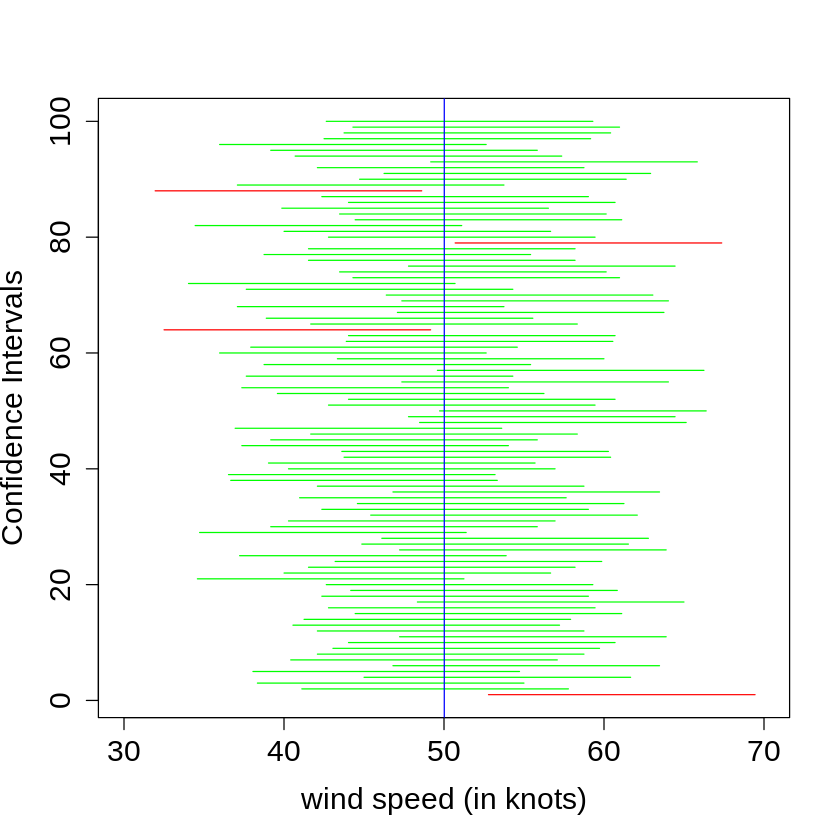

In [9]:
####################
# run code
# nothing to edit
#####################
set.seed(16)
counter <- 0
plot(x = c(30, 70),
     y = c(1, 100),
     type = "n",
     xlab = "wind speed (in knots)",
     ylab = "Confidence Intervals",
     cex.lab=1.5, cex.axis=1.5, cex.main=1.5)  # increase font size on labels

for (i in 1:100)
{
  x <- sample(population, size = 36, replace = FALSE)
  L <- mean(x) - 1.96*sqrt(650/36)
  U <- mean(x) + 1.96*sqrt(650/36)
  if ( L < mean(population) && mean(population) < U)
  {
    counter <- counter + 1
    plot.color  <- "green"
  }
  else
    plot.color  <- "red"
  segments(L, i, U, i, col = plot.color)
}

abline(v = mean(population), col = "blue")

## <a name="19q7">Question 7</a>

---

What are some warnings to keep in mind when interpreting confidence
intervals?

### <a name="19sol7">Solution to Question 7</a>

---

Warning 1:

<br>

Warning 2:

<br>

Warning 3:

<br>  
<br>

## <a name="19q8">Question 8</a>

---

You will use the original random sample of $n=36$ wind speeds stored in
`my.sample` in \[Question 1\] to construct a new confidence interval
estimate for the mean wind speed of all North Atlantic storms. If you
have not already loaded the `population` data and created a sample size
$n=36$ stored in `my.sample`, be sure to answer \[Question 1\] before
continuing.

### <a name="19q8a">Question 8a</a>

---

Based on your sample data in `my.sample`, give a **90% confidence
interval** for the mean wind speed of all North Atlantic storms using
the parametric method. As with earlier, suppose we know population
variance is $\sigma^2_X = 650$. **Interpret the practical meaning of
your 90% confidence interval in the context of this example.**

#### <a name="19sol8a">Solution to Question 8a</a>

---

In [ ]:
new.z <- ??  # Enter a command to calculate z value for 90% Conf Level
wind.lowe90 <- ??   # Enter a command to calculate the lower limit
wind.upper90 <- ??   # Enter a command to calculate the upper limit

# Print your answers
wind.lower90
wind.upper90

<br>  
<br>

**Practical interpretation of your 90% confidence interval:**

<br>  
<br>  
<br>

### <a name="19q8b">Question 8b</a>

---

As we **decrease the confidence level of the interval** from 95% in
\[Question 4f\] to 90% in \[Question 8a\], what happened to the width of
the interval estimate?

#### <a name="19sol8b">Solution to Question 8b</a>

---

<br>  
<br>  
<br>

# <a name="19change-cl">Changing the Confidence Level</a>

---

For a sample size $n$ randomly picked from a normal distribution with
unknown $\mu$ and known $\mbox{Var}(X)=\sigma^2$, then a
 <font color="dodgerblue">**confidence interval for the
mean**</font> is given by

$$\boxed{ \large \overline{X} - {\color{tomato}{z_{\alpha/2}}} \cdot \frac{\sigma}{\sqrt{n}} < \mu < \overline{X} + {\color{tomato}{z_{\alpha/2}}} \cdot \frac{\sigma}{\sqrt{n}}},$$

where the area under $N(0,1)$ between $\pm z_{\alpha/2}$ is equal to the
 <font color="dodgerblue">**confidence level**</font> of the
estimate.

-   The confidence level is the success rate of the estimate.
-   The distance ${\color{dodgerblue}{\mbox{MoE} = z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}}}$ is called the  <font color="dodgerblue">**Margin of Error (MoE)**</font> of the confidence interval.

$$ \mu \approx \overline{X} \pm {\color{dodgerblue}{z_{\alpha/2} \cdot \mbox{SE}}} =  \overline{X} \pm {\color{dodgerblue}{\mbox{MoE}}}$$

Let  <font color="dodgerblue">**CL**</font> denote a selected
 <font color="dodgerblue">**confidence level**</font> that is the
proportion of  <font color="dodgerblue">**area in the
middle**</font>.

-   We have ${\color{mediumseagreen}{\alpha = 1 - CL}}$ is the  <font color="mediumseagreen">**area in the two tails**</font>.
-   The  <font color="tomato">**area in each tail**</font> is therefore $\color{tomato}{\dfrac{\alpha}{2}}$.

<center>
<figure>
<img
src="https://upload.wikimedia.org/wikipedia/commons/1/1c/19fig-cl.png"
alt="Identifying Z Values for Confidence Interval" width = "75%"/>
<figcaption aria-hidden="true">
Credit: Adam Spiegler, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>
</figcaption>
</figure>
</center>

# <a name="19var-unknown">Confidence Intervals When the Variance Is Unknown</a>

---

When estimating a population mean, in addition to $\mu$ being unknown,
we often **do not know the population variance, $\sigma^2$, either.** We
pick a random sample size $n$, and we can plug-in the sample mean
$\bar{x}$ as our point estimate for $\mu$. How can we find the margin of
error if $\sigma$ is unknown?

-   We can use the  <font color="tomato">**sample standard deviation**</font> $\color{tomato}{s}$ in place of $\sigma$.

From the CLT for means, as long as the sample is normally distributed or
if $n \geq 30$, then we know the distribution of sample means
$\overline{X}$ is normally distributed with mean
${\color{mediumseagreen}{\mu_{\overline{X}} = \mu_X}}$ and standard
error
${\color{dodgerblue}{\sigma_{\overline{X}} = \frac{\sigma}{\sqrt{n}}}}$.
Thus, the standardized distribution of $z$-scores corresponding the
sampling distribution for the sample mean $\overline{X}$ is normal:

$$Z = \frac{\overline{X} - \color{mediumseagreen}{\mu_{\overline{X}}}}{{\color{dodgerblue}{\sigma_{\overline{X}}}}} = \frac{\overline{X} - \color{mediumseagreen}{\mu_{X}}}{{\color{dodgerblue}{\sigma_{X}/\sqrt{n}}}} \sim N(0,1).$$

Let's apply our  <font color="tomato">substitution of $s$ in place
of $\sigma_{X}$</font> and consider the resulting distribution of
standardized statistics denoted $W$:

$$Z = \frac{\overline{X} - \mu_{X}}{{\color{tomato}{\sigma_{X}}}/\sqrt{n}} \quad \xrightarrow{\text{plug-in } {\color{tomato}{s}} \text{ for } {\color{tomato}{\sigma_{X}}}}  \quad W = \frac{\overline{X}-\mu_X}{{\color{tomato}{s}}/\sqrt{n}} \sim \mbox{ ?}$$

-   The plot on the left gives a histogram for the standardized sampling distribution $W$.
-   The plot on the right is a QQ-plot comparing the distribution of $W$ to $Z \sim N(0,1)$.


<figure>
<img
src="https://upload.wikimedia.org/wikipedia/commons/e/ef/19fig-plotw.png"
alt="Standardized Distribution When Variance Unknown" />
<figcaption aria-hidden="true">
Credit: Adam Spiegler, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>
</figcaption>
</figure>


The distribution $W$ is symmetric and bell-shaped. From the QQ-plot, we
see $W$ is approximately normal in the middle of the distribution.
However, the tails of distribution $W$ are not similar to tails of a
normal distribution. Distribution $W$ has **fatter tails** than a normal
distribution.

-   The fatter tails are due to the **added uncertainty** with using $s$ to estimate the value of $\sigma$.

<center>
<figure>
<img
src="https://upload.wikimedia.org/wikipedia/commons/b/b9/19fig-tdist.png"
alt="Plots of t-distributions with different degrees of freedom" width = "85%"/>
<figcaption aria-hidden="true">
Credit: Adam Spiegler, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>
</figcaption>
</figure>
</center>



## <a name="19t-dist">The $t$-Distribution</a>

---

When the population is known to be normally distributed, the
distribution $W$ is a  <font color="dodgerblue">**$t$-distribution
with $n-1$ degrees of freedom**</font>, where $n$ denotes the sample
size. If the underlying population is known to be symmetric (but not
necessarily normal), a $t$-distribution with $n-1$ degrees of freedom is
still a good estimate.

-   The larger our sample size $n$, the better (less biased) the estimate $s$ is for $\sigma$.
-   The larger the sample size $n$, the closer the $t$-distribution is to $Z \sim N(0,1)$.

If a random sample of data is skewed, then the population is likely
skewed. The more skewed the population is, the less accurate a
$t$-distribution is to estimate the distribution of the standardized
statistic $W$.

In cases where the sample is small ($n < 30$) and skewed, a bootstrap
confidence interval is typically preferred to using a $t$-distribution
to approximate the margin of error.

## <a name="19using-t">Using a $t$-Distribution When Variance is Unknown</a>

---

For a sample size $n$ randomly picked from a normal distribution with
unknown $\mu$ and unknown $\mbox{Var}(X)=\sigma^2$, we construct a
confidence interval for $\mu$ using:

-   The  <font color="tomato">sample standard deviation $s$</font> in place of $\sigma$, and  
-   A  <font color="dodgerblue">$t$-distribution to find $t_{\alpha/2}$</font> instead of using $N(0,1)$ to find $z_{\alpha/2}$

A corresponding $t$-distribution confidence interval is given by

$${\large \boxed{ \overline{X} - {\color{dodgerblue}{t_{\alpha/2}}} \cdot \frac{{\color{tomato}{s}}}{\sqrt{n}} < \mu < \overline{X} + {\color{dodgerblue}{t_{\alpha/2}}} \cdot \frac{{\color{tomato}{s}}}{\sqrt{n}}}},$$

where the area under the $t$-distribution with $n-1$ degrees of freedom
between ${\color{dodgerblue}{\pm t_{\alpha/2}}}$ is equal to the
confidence level.

## <a name="19q9">Question 9</a>

---



<figure>
<img
src="https://upload.wikimedia.org/wikipedia/commons/9/96/Komodo_dragon_%28Varanus_komodoensis%29_2.jpg"
alt="Komodo dragon (Varanus_komodoensis)" width = "45%"/>
<figcaption aria-hidden="true">
Credit: Charles J. Sharp, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via <a href="https://upload.wikimedia.org/wikipedia/commons/9/96/Komodo_dragon_%28Varanus_komodoensis%29_2.jpg">Wikimedia Commons</a>
</figcaption>
</figure>


Researchers want to estimate the average length of all adult female
Komodo dragons. The pick a random sample of $n=8$ adult female Komodo
dragons with the following weights (in pounds). They believe the
distribution in weights will by normally distributed, but otherwise, the
population variance is unknown.

In [ ]:
dragon.wt <- c(145, 178, 142, 139, 160, 190, 168, 122)  # load sample of weights
dragon.wt  # print to screen

### <a name="19q9a">Question 9a</a>

---

Use the R code cell below to construct a 95% confidence interval for
mean weight of all female Komodo dragons using the sample weights in
`dragon.wt`.

Using the data in `dragon.wt`, calculate the statistics $\bar{x}$ and
$s$. To find $t_{\alpha/2}$, use the `qt()` function similar to how you
use the `qnorm()` to calculate $z_{\alpha/2}$. For more help using the
`qt()` function, run `?qt()`.

#### <a name="19sol9a">Solution to Question 9a</a>

---

In [ ]:
# construct a 95% confidence interval


<br>  
<br>

### <a name="19q9b">Question 9b</a>

---

Interpret the practical meaning of the confidence interval in \[Question
9a\] in this context.

#### <a name="19sol9b">Solution to Question 9b</a>

---

<br>  
<br> <br>

### <a name="19q9c">Question 9c</a>

---

Use the R code cell below to construct a 99% confidence interval for
mean weight of all female Komodo dragons using the sample weights in
`dragon.wt`.

#### <a name="19sol9c">Solution to Question 9c</a>

---

In [ ]:
# construct a 99% confidence interval


<br>  
<br>

## <a name="19methods">Different Methods for $T$ Confidence Intervals</a>

---

-   Use the formula $\displaystyle \overline{X} - {\color{dodgerblue}{t_{\alpha/2}}} \cdot \frac{{\color{tomato}{s}}}{\sqrt{n}} < \mu < \overline{X} + {\color{dodgerblue}{t_{\alpha/2}}} \cdot \frac{{\color{tomato}{s}}}{\sqrt{n}}$.

    -   Use the `qt()` function in R to find the value of $t_{\alpha/2}$, or
    -   Use a [$t$-distribution table](https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf) to estimate values for $t_{\alpha/2}$.

-   Use the R function `t.test(x, conf.level)$conf.int`.

    -   `x` is the vector of sample data.
    -   Set the confidence level with the `conf.level` option.
    -   Open the help manual with `?t.test` for further information.

## <a name="19q10">Question 10</a>

---

Using the Komodo dragon sample data in `dragon.wt` and the `t.test()`
function, find a 95% confidence interval. Compare the results with the
95% confidence interval from \[Question 9a\].

### <a name="19sol10">Solution to Question 10</a>

---

In [ ]:
t.test(??, conf.level = ??)$conf.int

<br>  
<br>

# <a name="19diff-means">Confidence Interval for a Difference in Two Means</a>

---

## <a name="19q11">Question 11</a>

---

Let $X$ and $Y$ be independent random variables with
$X \sim N(\mu_1, \sigma_1)$ and $Y \sim N(\mu_2, \sigma_2)$. Using
[properties of expected value](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Chap2/06-Expected-Value-and-Variance.ipynb#06prop-ex)
and [variance](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Chap2/06-Expected-Value-and-Variance.ipynb#06prop-var), show for sample
sizes $n_1$ and $n_2$, respectively, that

$$E(\overline{X}-\overline{Y}) = \mu_1-\mu_2 \qquad \mbox{and} \qquad \mbox{Var}(\overline{X}-\overline{Y}) = \frac{\sigma_1^2}{n_1} +  \frac{\sigma_2^2}{n_2}.$$

### <a name="19sol11">Solution to Question 11</a>

---

<br>  
<br>  
<br>

## <a name="19ci-diff">Confidence Intervals for a Difference in Means</a>

---

Let $X_1, X_2, \ldots , X_{n_1}$ be independent and identically
distributed (i.i.d.) random variables picked from
$X \sim N(\mu_1, \sigma_1^2)$ and let $Y_1, Y_2, \ldots , Y_{n_2}$ be
i.i.d. random variables picked from $Y \sim N(\mu_2, \sigma_1^2)$. An
approximate confidence interval for the difference in means
$\mu_1 - \mu_2$ is given by:

$${\large \boxed{ {\color{mediumseagreen}{(\overline{X} - \overline{Y})}} -  {\color{tomato}{t_{\alpha/2}}} \cdot  {\color{dodgerblue}{\sqrt{\frac{s_1^2}{n_1} +  \frac{s_2^2}{n_2}}}} < \mu_1 - \mu_2 < {\color{mediumseagreen}{(\overline{X} - \overline{Y})}} +  {\color{tomato}{t_{\alpha/2}}} \cdot  {\color{dodgerblue}{\sqrt{\frac{s_1^2}{n_1} +  \frac{s_2^2}{n_2}}}}}}. $$

-    <font color="mediumseagreen">Use $\bar{x} - \bar{y}$ as the point estimate for $\mu_1 - \mu_2$.</font>
-    <font color="dodgerblue">Approximate the standard error using $s_1$ and $s_2$ in place of unknown standard deviations $\sigma_1$ and $\sigma_2$.</font>
-    <font color="tomato">The area under the $t$-distribution with $df$ degrees of freedom between $\pm t_{\alpha/2}$ is equal to the confidence level.</font>
    -   Informally, we can use the smaller of $n_1-1$ and $n_2-1$ as the degrees of freedom.
    -   Many R functions use the more accurate *Welch's approximation* for the degrees of freedom,

    $$ df = \dfrac{\left( \dfrac{s_1^2}{n_1}+ \dfrac{s_2^2}{n_2} \right)^2}{ \dfrac{(s_1^2/n_1)^2}{n_1-1} + \dfrac{(s_2^2/n_2)^2}{n_2-1}}.$$
    -   We do not need to memorize Welch's approximation since `t.test()` uses this method.

# <a name="19strong">Which Month Has the Strongest Storms?</a>

---

In our analysis of [North Atlantic storm wind speeds](#19wind-intro), we
used data stored in the `storms` data frame in the `dplyr` package. In
our initial analysis, we assumed the data in `storms` represented the
population, and we did not have access to the population data in
`storms`. **The data in `storms` is actually a sample** of 19066 storm
observations taken for North Atlantic storms that are measured every six
hours during the lifetime of the storm. The population of interest is
all storms that occur at all times in the North Atlantic.

-   Consider data in `storms` as a random sample of 19066 observations picked from the population.
-   We have access to the sample `storms` that we will use estimate parameters for the population.
-   Below, we load `dplyr` and generate side-by-side box plots of the distribution of wind speeds in the `storms` sample by month.

In [ ]:
library(dplyr)
storms$month <- factor(storms$month)  # convert month to categorical factor
boxplot(wind ~ month,
        data = storms,
        main = "Distribution of Wind Speeds by Month",
        xlab = "Month",
        ylab = "Wind speed (in knots)")

## <a name="19q12">Question 12</a>

---

Based on the plots in the figure above, in which month do you suspect
storms have the greatest wind speed? Explain how you determined your
answer.

### <a name="19so12l">Solution to Question 12</a>

---

<br>  
<br>  
<br>

## <a name="19refine">Refining Our Question</a>

---

There are different statistics for assessing “greatest wind speed”. From
the box plots, we have a good visual comparison of medians. With storms,
outliers are typically the most important observations we do want to
emphasize in our analysis. Thus, we use the *mean* as our measurement of
center instead of a median or trimmed mean.

Side-by-side box plots give a nice graphical summary of the distribution
of winds speeds by month. As we might suspect, from this first plot we
rule out some months from this analysis. Some months appear to have very
similar distributions upon inspection of box plots. We dig a little into
the sample data to determine which months have the greatest sample mean
wind speeds.

-   We use the `tapply()` function below to calculate and compare sample mean wind speeds by month.
-   Here is a [nice introduction](https://www.statology.org/tapply-r/) to the `tapply()` function.

In [ ]:
tapply(storms$wind, storms$month, mean)

Notice September (9) and October (10) are the two months with the
highest mean wind speeds of $54.56$ knots and $51.58$ knots,
respectively. The two means are close, and we only have a subset of
population data. Is the observed difference in sample means greater than
the margin of error we can expect due to the uncertainty of sampling? We
can use a confidence interval to answer this question!

>  <font color="dodgerblue">Give a 95% confidence interval to
> estimate the difference in the mean wind speed of storms in September
> compared to October?</font>

## <a name="19subset">Subsetting into Two Independent Samples</a>

---

Run the code cell below to create two vectors, `sep.wind` and
`oct.wind`, containing separate samples of wind speeds for North
Atlantic storms in September and October, respectively. Both `sep.wind`
and `oct.wind` are data frames with just one variable, `wind`.

In [ ]:
# create a vector of sep wind
sep.wind <- subset(storms,
              month == "9",
              select = wind)

# create a vector of oct wind
oct.wind <- subset(storms,
              month == "10",
              select = wind)

## <a name="19q13">Question 13</a>

---

Answer the questions below to construct a 95% confidence interval for
the difference in mean wind speeds of North Atlantic storms in September
compared to October.

### <a name="19q13a">Question 13a</a>

---

Calculate $n_s$ and $n_o$, the number of observations in September and
October samples, respectively. Store the results in `n.s` and `n.o`.

#### <a name="19sol13a">Solution to Question 13a</a>

---

In [ ]:
# calculate n_s
n.s <- ??
# calculate n_o
n.o <- ??

# print to screen
n.s
n.o

<br>  
<br>

### <a name="19q13b">Question 13b</a>

---

Using the sample data in `sep.wind` and `oct.wind`, give a point
estimate for the difference in population means, $\mu_s - \mu_o$. Store
the result to `point.est`

#### <a name="19sol13b">Solution to Question 13b</a>

---

In [ ]:
# calculate point estimate
point.est <- ??
point.est  # print to screen

<br>  
<br>

### <a name="19q13c">Question 13c</a>

---

Using a $t$-distribution, calculate the margin of error of a 95%
confidence interval for the difference in means.

Use the `sd()` function to calculate each sample standard deviation. Use
the `qt()` function to identify $t_{\alpha/2}$ using the [informal
count](#19ci-diff) for the degrees of freedom.

#### <a name="19sol13c">Solution to Question 13c</a>

---

In [ ]:
# use code cell to construct a 95% confidence interval


<br>

**Based on the output above, a 95% confidence interval is from ?? to
??**.

<br>  
<br>

### <a name="19q13d">Question 13d</a>

---

Interpret the meaning of your interval in \[Question 13c\]. In
particular, can we conclude that wind speeds are on average greater in
one month or the other?

#### <a name="19sol13d">Solution to Question 13d</a>

---

<br>  
<br> <br>

# <a name="19ttest">Using `t.test()` for a Difference in Means</a>

---

The `t.test()` function in R can used to construct a confidence interval
for a difference in means from two independent populations using a
$t$-distribution with Welch's approximation for the degree's for
freedom. Let `x` and `y` denote vectors containing data from each of the
two independent samples.

-   The command `t.test(x, y, conf.level = 0.95)$conf.int` will give a 95% confidence level for the difference in means using Welch's approximation.

## <a name="19q14">Question 14</a>

---

Use the `t.test()` function with the samples `sep.wind` and `oct.wind`
to construct a 95% confidence interval for the difference in mean wind
speeds of North Atlantic storms in September compared to October. How
does your answer compare to your confidence interval in \[Question
13c\]? If the two answers are different, which confidence interval do
you believe is more accurate?

### <a name="19sol14">Solution to Question 14</a>

---

Complete the command below and then compare result to answer in
\[Question 13c\].

In [ ]:
t.test(??, ??, conf.level = ??)$conf.int

<br>  
<br>

## <a name="19subset-ttest">Subsetting with `t.test`</a>

---

Frequently, we would like to compare the distributions of a quantitative
variable, denoted `quant`, for two different groups based on a
categorical variable in the data set, denoted `categorical`. If our
sample data is stored in a data frame called `data.name` with this
structure, we can use `t.test()` without having to first split the
sample into independent samples according to category group. `t.test()`
can subset the data into independent samples for us and construct a
confidence interval for the difference in two means. Using the
`t.test()` function

<center>
`t.test(quant ~ categorical, data = data.name, conf.level = 0.95)$conf.int`
</center>

<br> will give a 95% confidence level for the difference in means of a
specified quantitative variable between the two different groups of the
categorical variable.

## <a name="19q15">Question 15</a>

---

The code cell below subsets the sample data for all months in `storms`
to a new data frame named `pooled` that:

-   Includes only storm observations from September or July.
-   Selects only two variables, `wind` and `month`, to keep from `storms`.
-   The first six rows of the data frame `pooled` are printed to the screen with `head(pooled)`.
-   Run the code cell below and inspect the first six rows of `pooled`.

In [ ]:
pooled <- subset(storms,
               month == "9" | month == "10",   # month is 9 OR month is 10
               select = c(wind, month))  # select wind and month variables

head(pooled)  # print first 6 rows of pooled to screen

Use the `t.test()` function with single pooled sample `pooled` to
construct a 95% confidence interval for the difference in mean wind
speeds of North Atlantic storms in September compared to October. How
does your answer compare to your confidence intervals in \[Question
13c\] and \[Question 14\]? If the two answers are different, which
confidence interval do you believe is more accurate?

### <a name="19sol15">Solution to Question 15</a>

---

Complete the command below and then compare the result to your answers
in \[Question 13c\] and \[Question 14\].

In [ ]:
t.test(?? ~ ??, data = ??, conf.level = ??)$conf.int

## <a name="19caution-ttest">Caution Using `t.test()` for a Difference in Two Means</a>

---

The variable `month` in the original sample `storms` has observations
from **10 different months**. If you try running the command
`t.test(wind ~ month, data = storms, conf.level = 0.95)$conf.int` you
will receive an error since the categorical variable `month` has more
than two classes.  <font color="dodgerblue">**The categorical
variable used to split the data must have exactly 2 different
classes**</font>. In solving \[Question 15\] we avoided this error by:

-   First creating the `pooled` sample that included only two months, September and October.
-   Then using `t.test()` with the `pooled` sample instead of the full `storms` data set.

Otherwise, we can split the original sample into two independent samples
`x` and `y` and use the `t.test()` function as we did in \[Question 14\]
with independent wind speed samples `sep.wind` and `oct.wind`.

# <a name="19CC License">Creative Commons License Information</a>
---

![Creative Commons
License](https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png)

*Statistical Methods: Exploring the Uncertain* by [Adam
Spiegler (University of Colorado Denver)](https://github.com/CU-Denver-MathStats-OER/Statistical-Theory)
is licensed under a [Creative Commons
Attribution-NonCommercial-ShareAlike 4.0 International
License](http://creativecommons.org/licenses/by-nc-sa/4.0/). This work is funded by an [Institutional OER Grant from the Colorado Department of Higher Education (CDHE)](https://cdhe.colorado.gov/educators/administration/institutional-groups/open-educational-resources-in-colorado).

For similar interactive OER materials in other courses funded by this project in the Department of Mathematical and Statistical Sciences at the University of Colorado Denver, visit <https://github.com/CU-Denver-MathStats-OER>.